In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
data=pd.read_csv("/content/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


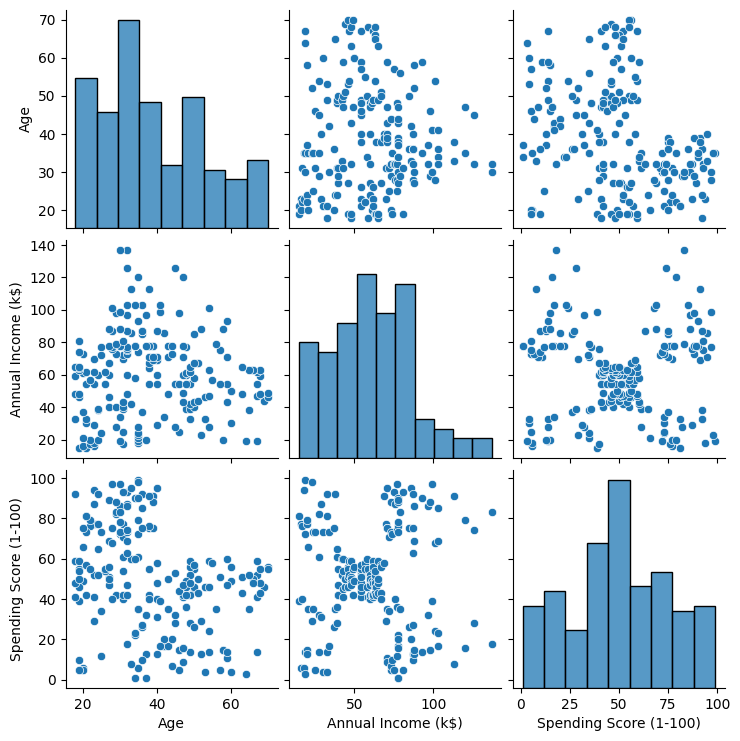

In [ ]:
sns.pairplot(data[["Age","Annual Income (k$)","Spending Score (1-100)"]])
plt.show()

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


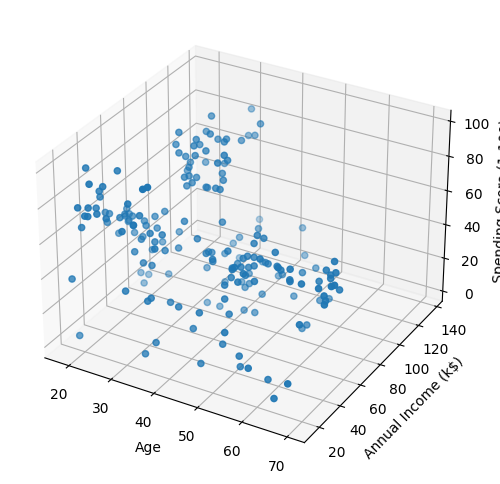

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)'])

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.show()

<Figure size 800x600 with 0 Axes>

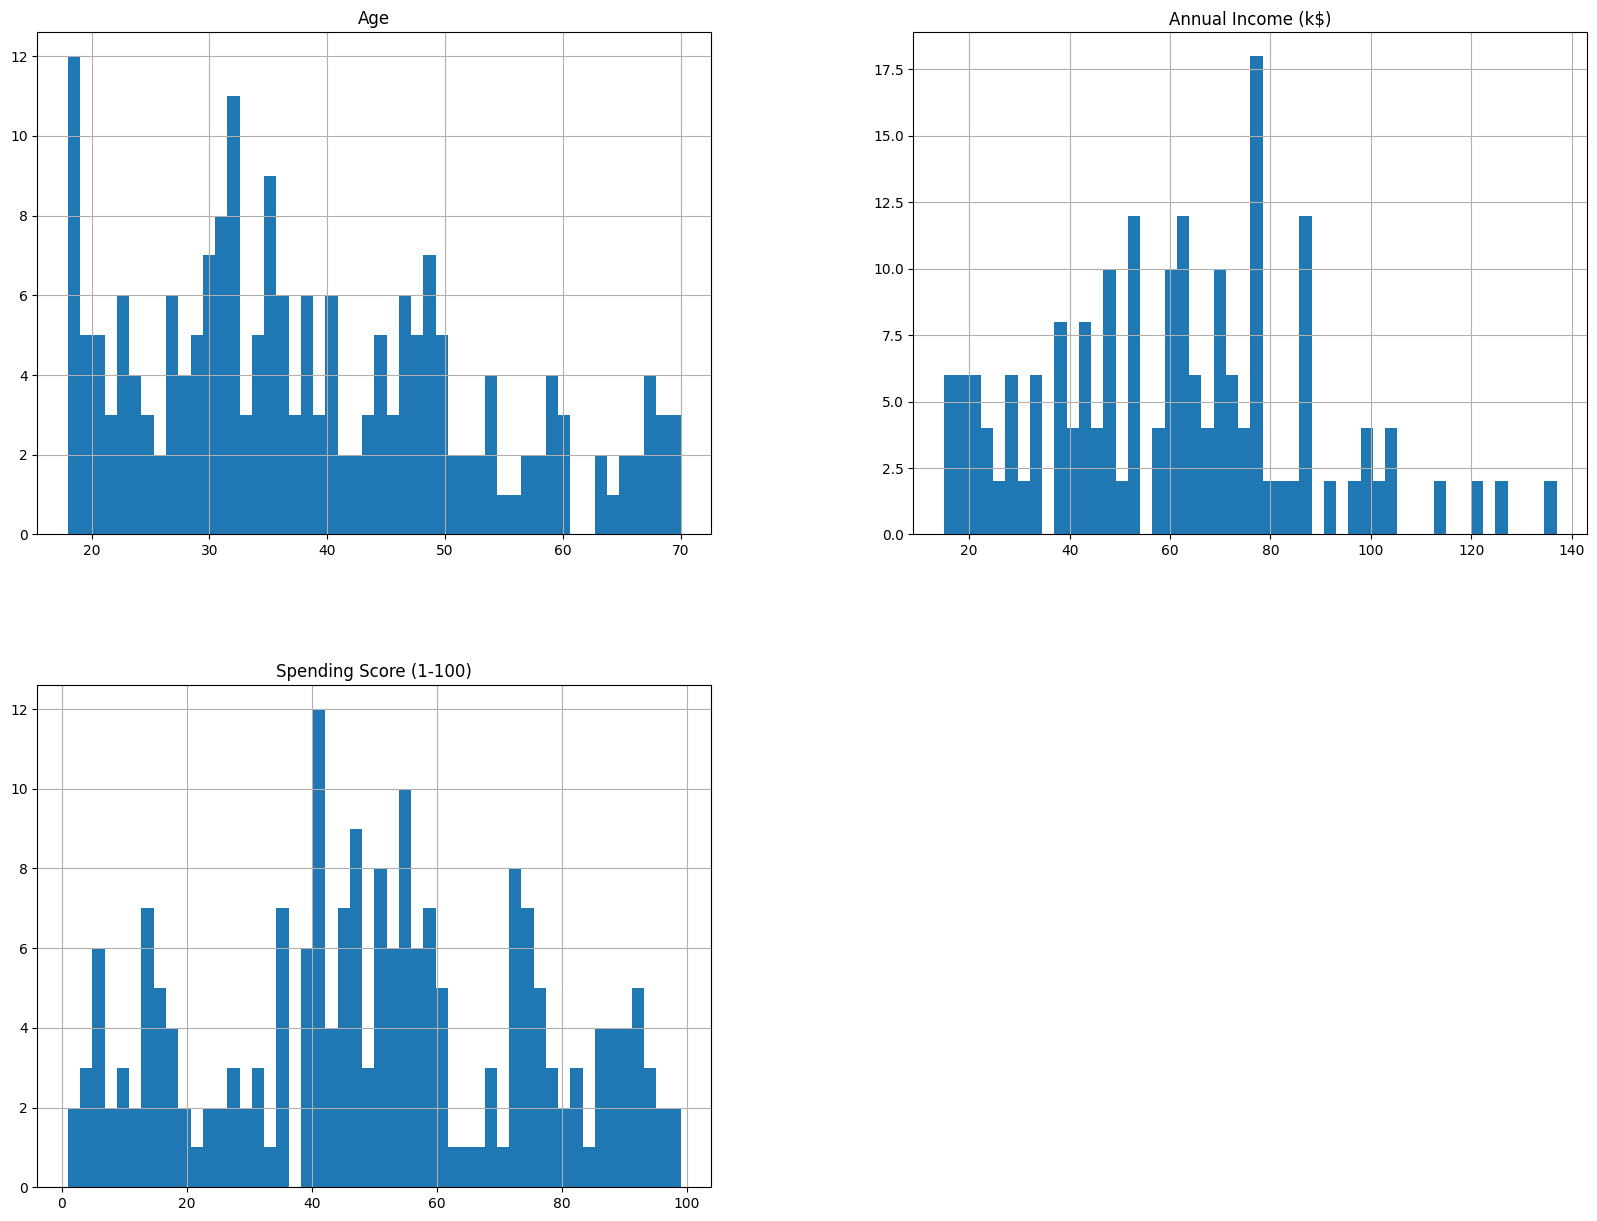

In [ ]:
plt.figure(1,figsize=(8,6))
data[['Age','Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
x=data[['Annual Income (k$)', 'Spending Score (1-100)']]
linked = linkage(x, method='ward')

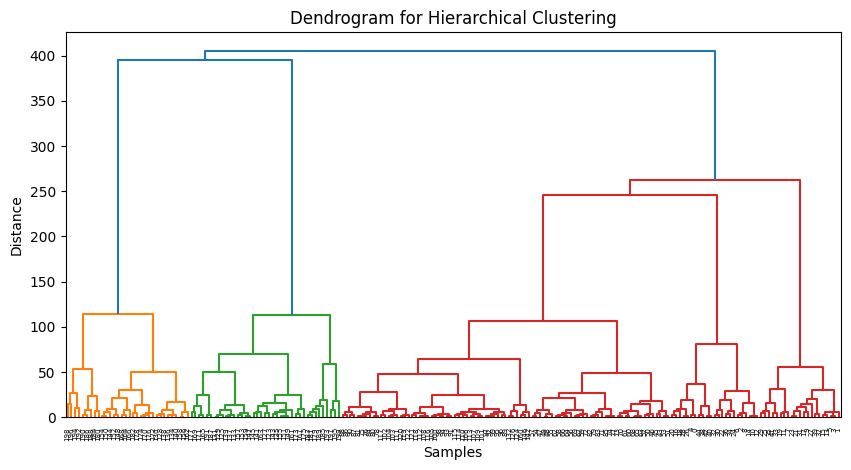

In [ ]:
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred = hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
data['Cluster'] = y_pred
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

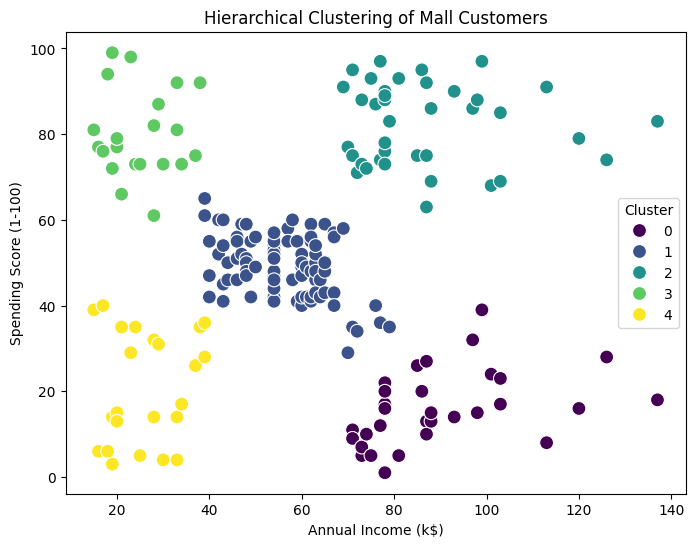

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, hue='Cluster', palette='viridis', s=100)
plt.title('Hierarchical Clustering of Mall Customers')
plt.show()

In [ ]:
from sklearn import metrics
db = metrics.davies_bouldin_score(x, y_pred)
print(f"Davies-Bouldin Index: {db}")

Davies-Bouldin Index: 0.5782207452369454


In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
scatter_plot = go.Scatter3d(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    z=data['Age'],
    mode='markers',
    marker=dict(
        color=data['Cluster'],
        colorscale='Viridis',
        size=12,
        line=dict(color=data['Cluster'], width=12),
        opacity=0.8
    ),
    text=data['Cluster'],
    hoverinfo='text'
)
data_to_plot = [scatter_plot]
layout = go.Layout(
    title=dict(text='Clusters using Agglomerative Clustering', font=dict(size=24)),
    scene=dict(
        xaxis=dict(title='Annual Income (k$)', titlefont=dict(size=18)),
        yaxis=dict(title='Spending Score (1-100)', titlefont=dict(size=18)),
        zaxis=dict(title='Age', titlefont=dict(size=18))
    )
)
fig = go.Figure(data=data_to_plot, layout=layout)
py.iplot(fig)
